## 选择UCI中的BuddyMove数据集或者自选与专业相关的数据集，采用三种以上的无监督聚类算法进行聚类分析，选择你认为合适的内部度量指标（DB指数等）对这些算法进行评估对比，选出最优模型。

###### # -*- coding: utf-8 -*-
###### # @Time : 2022/4/21
###### # @EMAIL： duanyu@bjtu.edu.cn
###### # @Software: PyCharm


### BuddyMove数据集

In [9]:
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas as pd
b_data = pd.read_csv('buddymove.csv')
dataframe = b_data.loc[:,['Sports' , 'Religious' , 'Nature' , 'Theatre' , 'Shopping' , 'Picnic']]
X = dataframe.values
print(X)

[[  2  77  79  69  68  95]
 [  2  62  76  76  69  68]
 [  2  50  97  87  50  75]
 ...
 [ 20 124 178 104 158 174]
 [ 20 133 149 139 144 213]
 [ 20 143 149 139 159 143]]


### K-Means

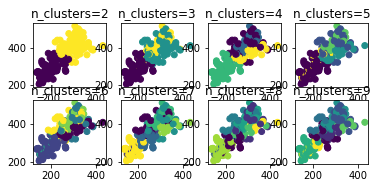

K-Means with best Parameters:
n_clusters=9, score=149.75322629645518, The figure is:


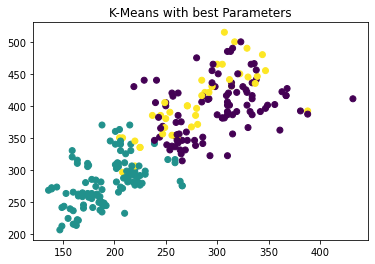

In [10]:
from sklearn.cluster import KMeans
max_score = -1
for i in range(2,10):
    bdm_model = KMeans(n_clusters=i,
                         max_iter=10000,
                         init='k-means++')

    bdm_model.fit(X)
    y_pred = bdm_model.predict(X)
    #print(b_predict)
    score = metrics.calinski_harabasz_score(X, y_pred)
    if max_score<score:
        best_param=i
        max_score=score
    plt.subplot(3,4,i-1)
    plt.scatter(x=X[:,0]+X[:,2]+X[:,4],
                y=X[:,1]+X[:,3]+X[:,5],
                c=y_pred)
    plt.title('n_clusters={}'.format(i))

plt.show()

print("K-Means with best Parameters:")
bdm_model = KMeans(n_clusters=best_param,
                    max_iter=10000,
                    init='k-means++')
bdm_model.fit(X)
y_pred = bdm_model.predict(X)
#print(b_predict)
score = metrics.calinski_harabasz_score(X, y_pred)
print('n_clusters={}, score={}, The figure is:'.format(i,score))
plt.scatter(x=X[:,0]+X[:,2]+X[:,4],
            y=X[:,1]+X[:,3]+X[:,5],
            marker='o', c=y_pred)
plt.title("K-Means with best Parameters")
plt.show()

### DBSCAN

When Epsilon： 3.317 MinPt= 2 ,score= 2.664283567320006
Epsilon： 3.317 MinPt= 2 score: 2.664283567320006
When Epsilon： 3.318 MinPt= 2 ,score= 2.664283567320006
Epsilon： 3.318 MinPt= 2 score: 2.664283567320006
When Epsilon： 3.319 MinPt= 2 ,score= 2.664283567320006
Epsilon： 3.319 MinPt= 2 score: 2.664283567320006
When Epsilon： 3.32 MinPt= 2 ,score= 2.664283567320006
Epsilon： 3.32 MinPt= 2 score: 2.664283567320006
When Epsilon： 3.321 MinPt= 2 ,score= 2.664283567320006
Epsilon： 3.321 MinPt= 2 score: 2.664283567320006
When Epsilon： 3.322 MinPt= 2 ,score= 2.664283567320006
Epsilon： 3.322 MinPt= 2 score: 2.664283567320006
When Epsilon： 3.323 MinPt= 2 ,score= 2.664283567320006
Epsilon： 3.323 MinPt= 2 score: 2.664283567320006
When Epsilon： 3.324 MinPt= 2 ,score= 2.664283567320006
Epsilon： 3.324 MinPt= 2 score: 2.664283567320006
When Epsilon： 3.325 MinPt= 2 ,score= 2.664283567320006
Epsilon： 3.325 MinPt= 2 score: 2.664283567320006
When Epsilon： 3.326 MinPt= 2 ,score= 2.664283567320006
Epsilon： 3.

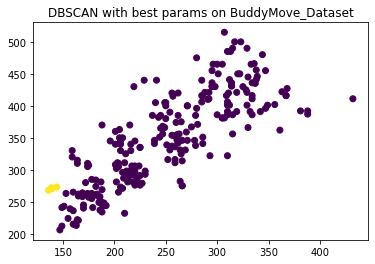

In [11]:
from sklearn.cluster import DBSCAN


max_score = -1
best_param = [-1,-1]#eps,minpt
for epsilon in (x/1000 for x in range(1,10000)):
    try:
        for minpt in range(2,6):

            bdm_model = DBSCAN(eps=epsilon,
                                min_samples=minpt,
                                metric='euclidean',
                                algorithm='auto')
            y_pred = bdm_model.fit_predict(X)
            #print(y_pred)
            score = metrics.calinski_harabasz_score(X, y_pred)
            print("When Epsilon：", epsilon,
                  "MinPt=", minpt,
                  ",score=", score)
            if score > max_score:
                max_score = score
                best_param = [epsilon,minpt]
            print("Epsilon：", epsilon,
                  "MinPt=", minpt,
                  "score:", score)
    except:
        pass
print('Best parameter is: [Epsilon:{},MinPt:{}]'.format(best_param[0],best_param[1]))

bdm_model = DBSCAN(eps=best_param[0],
                    min_samples=best_param[1],
                    metric='euclidean',
                    algorithm='auto')
y_pred = bdm_model.fit_predict(X)
score = metrics.calinski_harabasz_score(X, y_pred)
print(y_pred)

import matplotlib.pyplot as plt

plt.scatter(x=X[:,0]+X[:,2]+X[:,4],
            y=X[:,1]+X[:,3]+X[:,5],
            marker='o', c=y_pred)
print("The Prediction of best-param DBSCAN model is:")
plt.title("DBSCAN with best params on BuddyMove_Dataset")
plt.show()

### AGNES

In [12]:
from sklearn.cluster import AgglomerativeClustering

###### 寻找最优参数值

Dist_fun:euclidean, c_clusters=2, score=6.385454780196507
Dist_fun:euclidean, c_clusters=3, score=45.76667148290266
Dist_fun:euclidean, c_clusters=4, score=81.7921131635597
Dist_fun:euclidean, c_clusters=5, score=88.82724694278208
Dist_fun:euclidean, c_clusters=6, score=90.71544980544228
Dist_fun:euclidean, c_clusters=7, score=91.64919010370375
Dist_fun:euclidean, c_clusters=8, score=92.21544938079083
Dist_fun:euclidean, c_clusters=9, score=97.26840186988247
Dist_fun:l1, c_clusters=2, score=92.17467743773626
Dist_fun:l1, c_clusters=3, score=128.82112215522636
Dist_fun:l1, c_clusters=4, score=96.7415051500703
Dist_fun:l1, c_clusters=5, score=99.977108151446
Dist_fun:l1, c_clusters=6, score=103.52280925521897
Dist_fun:l1, c_clusters=7, score=109.41273732990317
Dist_fun:l1, c_clusters=8, score=103.03546462451621
Dist_fun:l1, c_clusters=9, score=94.88204915656648
Dist_fun:manhattan, c_clusters=2, score=92.17467743773626
Dist_fun:manhattan, c_clusters=3, score=128.82112215522636
Dist_fun:ma

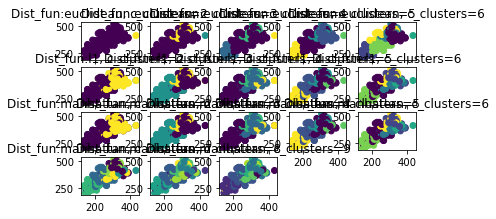

Best Params: ['l1', 3]


In [13]:
max_score = -1
best_param = [-1,-1]
for j,distfun in enumerate(('euclidean','l1', 'manhattan')):
    for n in range(2,10):
        y_pred = AgglomerativeClustering(n_clusters=n,linkage='complete', affinity=distfun).fit_predict(X)
        score = metrics.calinski_harabasz_score(X, y_pred)
        if score > max_score:
            max_score = score
            best_param = [distfun,n]
        print('Dist_fun:{}, c_clusters={}, score={}'.format(distfun,n,score))
        plt.subplot(5,5,n-1+j*5)
        plt.scatter(x=X[:,0]+X[:,2]+X[:,4],
                    y=X[:,1]+X[:,3]+X[:,5],
                    marker='o', c=y_pred)
        plt.title('Dist_fun:{}, c_clusters={}'.format(distfun,n))
plt.show()
print("Best Params:",best_param)

#### 最佳模型

Dist_fun:manhattan, c_clusters=9, score=128.82112215522636


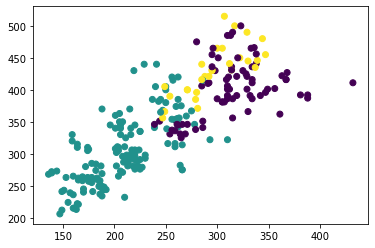

In [14]:
y_pred = AgglomerativeClustering(n_clusters=3,linkage='complete', affinity='l1').fit_predict(X)
score = metrics.calinski_harabasz_score(X, y_pred)
print('Dist_fun:{}, c_clusters={}, score={}'.format(distfun,n,score))
plt.scatter(x=X[:,0]+X[:,2]+X[:,4],
            y=X[:,1]+X[:,3]+X[:,5],
            marker='o', c=y_pred)
plt.show()